<a href="https://colab.research.google.com/github/ewuerfel66/DS-Unit-2-Sprint-2-Regression/blob/master/DS_Sprint_Challenge_7_Classification_1_EricWuerfel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science, Unit 2_
 
# Sprint Challenge: Predict Steph Curry's shots 🏀

For your Sprint Challenge, you'll use a dataset with all Steph Curry's NBA field goal attempts. (Regular season and playoff games, from October 28, 2009, through June 5, 2019.) 

You'll use information about the shot and the game to predict whether the shot was made. This is hard to predict! Try for an accuracy score in the high 50's or low 60's. The dataset was collected with the [nba_api](https://github.com/swar/nba_api) Python library.

In [131]:
!pip install category_encoders

In [0]:
from sklearn.metrics import accuracy_score

# The usual suspects
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Data Wrangling
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# Models
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [0]:
import pandas as pd
import datetime
url = 'https://drive.google.com/uc?export=download&id=1fL7KPyxgGYfQDsuJoBWHIWwCAf-HTFpX'
df = pd.read_csv(url, parse_dates=['game_date']).set_index('game_date')
assert df.shape == (13958, 19)

In [0]:
# Drop the player name, there isn't any variance
df = df.drop(['player_name', 'shot_zone_range'], axis=1)

This Sprint Challenge has two parts. To demonstrate mastery on each part, do all the required, numbered instructions. To earn a score of "3" for the part, also do the stretch goals.

## Part 1. Prepare to model

### Required

1. **Do train/validate/test split.** Use the 2009-10 season through 2016-17 season to train, the 2017-18 season to validate, and the 2018-19 season to test. NBA seasons begin in October and end in June. You'll know you've split the data correctly when your train set has 11081 observations, your validation set has 1168 observations, and your test set has 1709 observations.
2. **Begin with baselines for classification.** Your target to predict is `shot_made_flag`. What is the baseline accuracy for the validation set, if you guessed the majority class for every prediction?
3. **Use Ordinal Encoding _or_ One-Hot Encoding,** for the categorical features you select.
4. **Train a Random Forest _or_ Logistic Regression** with the features you select.

### Stretch goals
Engineer at least 4 of these 5 features:

- **Homecourt Advantage**: Is the home team (`htm`) the Golden State Warriors (`GSW`) ?
- **Opponent**: Who is the other team playing the Golden State Warriors?
- **Seconds remaining in the period**: Combine minutes remaining with seconds remaining, to get the total number of seconds remaining in the period.
- **Seconds remaining in the game**: Combine period, and seconds remaining in the period, to get the total number of seconds remaining in the game. A basketball game has 4 periods, each 12 minutes long.
- **Made previous shot**: Was Steph Curry's previous shot successful?

### train/validate/test split

In [0]:
# Split data into Train/Validate/Test
train = df['2009-10-27':'2017-07-01']
val = df['2017-10-01':'2018-07-01']
test = df['2018-10-01':'2019-07-01']

In [0]:
# Feature and target selection
target = 'shot_made_flag'

In [0]:
X_train = train.drop(columns=[target])
y_train = train[target]

X_val = val.drop(columns=target)
y_val = val[target]

X_test = test.drop(columns=target)
y_test = test[target]

### majority class baseline model

In [138]:
# Is it more likely than not that Curry made a shot?
df['shot_made_flag'].mean()

0.4729187562688064

In [0]:
# It's slightly less than likely that Curry will make a shot
# Let's predict he doesn't make a shot
y_train_pred = [0] * len(train)
y_val_pred = [0] * len(val)
y_test_pred = [0] * len(test)

In [140]:
# Get our accuracy scores
print("Training:", accuracy_score(y_train, y_train_pred))
print("Validation:", accuracy_score(y_val, y_val_pred))
print("Test:", accuracy_score(y_test, y_test_pred))

Training: 0.5272087356736757
Validation: 0.5162671232876712
Test: 0.5336454066705676


### encoding

In [0]:
# Let's use Ordinal Encoding to keep low dimensionality
encoder = ce.OrdinalEncoder()

In [0]:
# Fit the transform
X_train_encoded = encoder.fit_transform(X_train)

# Apply the transform to others
X_val_encoded = encoder.transform(X_val)
X_test_encoded = encoder.transform(X_test)

### random forest model

In [143]:
# Instantiate and fit a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_encoded, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
# Make predictions
y_train_pred = model.predict(X_train_encoded)
y_val_pred = model.predict(X_val_encoded)
y_test_pred = model.predict(X_test_encoded)

In [145]:
# Training accuracy
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))

Training Accuracy: 1.0


## Part 2. Evaluate models

### Required
1. Get your model's **validation accuracy.** (Multiple times if you try multiple iterations.)
2. Get your model's **test accuracy.** (One time, at the end.)
3. Get and plot your Random Forest's **feature importances** _or_ your Logistic Regression's **coefficients.**
4. Imagine this is the confusion matrix for a binary classification model. **Calculate accuracy, precision, and recall for this confusion matrix:**

<table>
  <tr>
    <td colspan="2" rowspan="2"></td>
    <td colspan="2">Predicted</td>
  </tr>
  <tr>
    <td>Negative</td>
    <td>Positive</td>
  </tr>
  <tr>
    <td rowspan="2">Actual</td>
    <td>Negative</td>
    <td style="border: solid">85</td>
    <td style="border: solid">58</td>
  </tr>
  <tr>
    <td>Positive</td>
    <td style="border: solid">8</td>
    <td style="border: solid"> 36</td>
  </tr>
</table>


### Stretch goals
- Calculate F1 score for the provided, imaginary confusion matrix.
- Plot a real confusion matrix for your basketball model, with row and column labels.
- Print the classification report for your model.

### validation accuracy

In [146]:
print("Validation:", accuracy_score(y_val, y_val_pred))

Validation: 0.5967465753424658


### test accuracy

In [147]:
print("Test:", accuracy_score(y_test, y_test_pred))

Test: 0.6079578700994733


### feature importances

In [0]:
# Find feature name
feature_names = X_train_encoded.columns.values

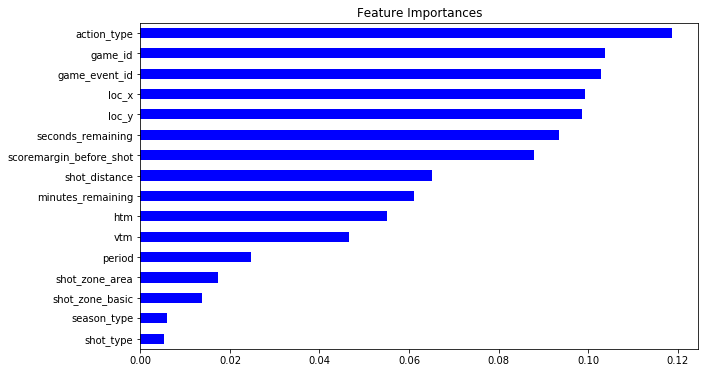

In [149]:
# Create and plot importances
importances = pd.Series(model.feature_importances_, feature_names)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
importances.sort_values()[:].plot.barh(color='blue');

### accuracy, precision & recall

<table>
  <tr>
    <td colspan="2" rowspan="2"></td>
    <td colspan="2">Predicted</td>
  </tr>
  <tr>
    <td>Negative</td>
    <td>Positive</td>
  </tr>
  <tr>
    <td rowspan="2">Actual</td>
    <td>Negative</td>
    <td style="border: solid">85</td>
    <td style="border: solid">58</td>
  </tr>
  <tr>
    <td>Positive</td>
    <td style="border: solid">8</td>
    <td style="border: solid"> 36</td>
  </tr>
</table>

In [150]:
# The accuracy tells us the proportion of shots that we correctly predicted

correct = 85 + 36
total = 85 + 36 + 58 + 8

print("Accuracy:", correct/total)

Accuracy: 0.6470588235294118


In [151]:
# Precision tells us proportion of positive predictions that were accurate

accurately_predicted_positives = 36
predicted_positives = 58 + 36

print("Precision:", accurately_predicted_positives/predicted_positives)

Precision: 0.3829787234042553


In [152]:
# Recall tells us the proportion of true positives that were correctly predicted

true_positives = 8 + 36

print("Recall:", accurately_predicted_positives/true_positives)

Recall: 0.8181818181818182
